<a href="https://colab.research.google.com/github/NuchPunnawichP/IoT__CU/blob/main/4_1_Image_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Processed image shape: (1, 224, 224, 3)


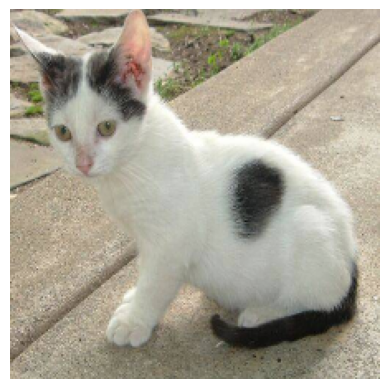

In [33]:
import numpy as np
import cv2
import requests
from PIL import Image
from io import BytesIO
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.imagenet_utils import decode_predictions

url = "https://raw.githubusercontent.com/NuchPunnawichP/IoT__CU/main/Assignment4/Testing_image/cat2.jpg"

response = requests.get(url, stream=True)
response.raise_for_status()

input_image = Image.open(BytesIO(response.content))

input_image_cv = cv2.cvtColor(np.array(input_image), cv2.COLOR_RGB2BGR)

input_image_resized = cv2.resize(input_image_cv, (224, 224))

input_image_batch = np.expand_dims(input_image_resized, axis=0)

print(f"Processed image shape: {input_image_batch.shape}")

plt.imshow(cv2.cvtColor(input_image_resized, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Top3 is: [('n02123597', 'Siamese_cat', 0.3048116), ('n02124075', 'Egyptian_cat', 0.09553055), ('n02909870', 'bucket', 0.058007006)]
Predicted =  Siamese_cat


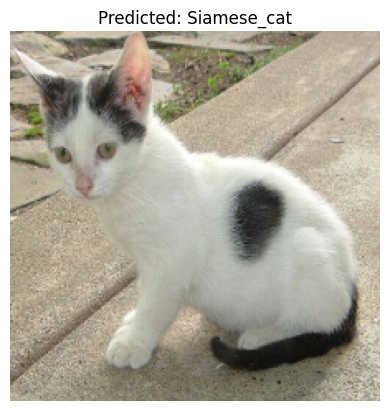

In [35]:
loadpath = "/content/Resnet50.h5"
resnet_model = tf.keras.models.load_model(loadpath)

predictions = resnet_model.predict(input_image_batch)
print("Predicted Top3 is:", decode_predictions(predictions, top=3)[0])

Answer = decode_predictions(predictions, top=1)[0][0][1]
print("Predicted = ", Answer)

plt.imshow(cv2.cvtColor(input_image_resized, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted: {Answer}")
plt.axis('off')
plt.show()